In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install catboost

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor

In [5]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/reworked_data.csv')

In [28]:
df.head(2)

,Unnamed: 0,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,amenity_1,amenity_2,amenity_3,amenity_4,amenity_5,amenity_6,amenity_7
0,0,Apartment,Shared room,2,1.0,Real Bed,flexible,False,NYC,t,f,2016-12-14,t,40.577507,-73.985210,"Не дорогая комната в Нью-Йорке, в Бруклине",Coney Island,1,100.0,11224.0,1.0,1.0,50.0,TV,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Heating,Family/kid friendly
1,1,Apartment,Entire home/apt,2,3.0,Real Bed,moderate,True,LA,t,f,2016-02-27,f,34.047200,-118.465782,Penthouse Loft Condo in Brentwood,Brentwood,2,100.0,90049,1.0,1.0,200.0,TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Elevator in building


In [6]:
del df["Unnamed: 0"]
del df["name"]
del df["latitude"]
del df["longitude"]

In [7]:
df["amenity_2"] = df["amenity_2"].astype("str")
df["amenity_3"] = df["amenity_3"].astype("str")
df["amenity_4"] = df["amenity_4"].astype("str")
df["amenity_5"] = df["amenity_5"].astype("str")
df["amenity_6"] = df["amenity_6"].astype("str")
df["amenity_7"] = df["amenity_7"].astype("str")

In [31]:
df.head(2)

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,amenity_1,amenity_2,amenity_3,amenity_4,amenity_5,amenity_6,amenity_7
0,Apartment,Shared room,2,1.0,Real Bed,flexible,False,NYC,t,f,2016-12-14,t,Coney Island,1,100.0,11224.0,1.0,1.0,50.0,TV,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Heating,Family/kid friendly
1,Apartment,Entire home/apt,2,3.0,Real Bed,moderate,True,LA,t,f,2016-02-27,f,Brentwood,2,100.0,90049,1.0,1.0,200.0,TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Elevator in building


In [8]:
target = "price"
X = df.drop(target, axis=1)
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
df.head(1)

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,amenity_1,amenity_2,amenity_3,amenity_4,amenity_5,amenity_6,amenity_7
0,Apartment,Shared room,2,1.0,Real Bed,flexible,False,NYC,t,f,2016-12-14,t,Coney Island,1,100.0,11224.0,1.0,1.0,50.0,TV,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Heating,Family/kid friendly


In [10]:
mapper = DataFrameMapper([
    ("property_type", LabelBinarizer()),
    ("room_type", LabelBinarizer()),
    (["accommodates"], StandardScaler()),
    (["bathrooms"], StandardScaler()),
    ("bed_type", LabelBinarizer()),
    ("cancellation_policy", LabelBinarizer()),
    ("cleaning_fee", LabelBinarizer()),
    ("city", LabelBinarizer()),
    ("host_has_profile_pic", LabelBinarizer()),
    ("host_identity_verified", LabelBinarizer()),
    ("host_since", LabelBinarizer()),
    ("instant_bookable", LabelBinarizer()),
    ("neighbourhood", LabelBinarizer()),
    (["number_of_reviews"], StandardScaler()),
    (["review_scores_rating"], StandardScaler()),
    ("zipcode", LabelBinarizer()),
    (["bedrooms"], StandardScaler()),
    (["beds"], StandardScaler()),
    ("amenity_1", LabelBinarizer()),
    ("amenity_2", LabelBinarizer()),
    ("amenity_3", LabelBinarizer()),
    ("amenity_4", LabelBinarizer()),
    ("amenity_5", LabelBinarizer()),
    ("amenity_6", LabelBinarizer()),
    ("amenity_7", LabelBinarizer())],df_out=True)

In [11]:
Z_train = mapper.fit_transform(X_train)

In [12]:
Z_test = mapper.transform(X_test)

In [38]:
model = LinearRegression().fit(Z_train,y_train)
print("LinearRegression train score is " + str(model.score(Z_train,y_train)))
print("LinearRegression test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

LinearRegression train score is 0.5483070616117913
LinearRegression test score is -9.092486379927929e+20
Mean squared error is 5182753353295.231


In [39]:
model = HuberRegressor().fit(Z_train,y_train)
print("HuberRegressor train score is " + str(model.score(Z_train,y_train)))
print("HuberRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor train score is 0.4447395412597144
HuberRegressor test score is 0.41553866491505126
Mean squared error is 131.40052626841307


In [40]:
model = Lasso().fit(Z_train,y_train)
print("Lasso train score is " + str(model.score(Z_train,y_train)))
print("Lasso test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

Lasso train score is 0.426927620190071
Lasso test score is 0.42602879170444696
Mean squared error is 130.21597454697954


In [41]:
model = Ridge().fit(Z_train,y_train)
print("Ridge train score is " + str(model.score(Z_train,y_train)))
print("Ridge test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

Ridge train score is 0.5752227744115217
Ridge test score is 0.47338428119033465
Mean squared error is 124.72862098690298


In [42]:
model = ElasticNet().fit(Z_train,y_train)
print("ElasticNet train score is " + str(model.score(Z_train,y_train)))
print("ElasticNet test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

ElasticNet train score is 0.3825588394169226
ElasticNet test score is 0.37577825668391374
Mean squared error is 135.79652538547728


In [43]:
model = RandomForestRegressor().fit(Z_train,y_train)
print("RandomForestRegressor train score is " + str(model.score(Z_train,y_train)))
print("RandomForestRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

RandomForestRegressor train score is 0.9337755043724774
RandomForestRegressor test score is 0.5468090437884269
Mean squared error is 115.70705207774198


In [44]:
model = DecisionTreeRegressor().fit(Z_train,y_train)
print("DecisionTreeRegressor train score is " + str(model.score(Z_train,y_train)))
print("DecisionTreeRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

DecisionTreeRegressor train score is 0.9999892244257734
DecisionTreeRegressor test score is 0.2961686252678485
Mean squared error is 144.19610284454834


In [45]:
model = AdaBoostRegressor().fit(Z_train,y_train)
print("AdaBoostRegressor train score is " + str(model.score(Z_train,y_train)))
print("AdaBoostRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

AdaBoostRegressor train score is -7.239782234752697
AdaBoostRegressor test score is -6.702387870244141
Mean squared error is 477.0148551928441


In [46]:
model = CatBoostRegressor().fit(Z_train,y_train)
print("CatBoostRegressor train score is " + str(model.score(Z_train,y_train)))
print("CatBoostRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

Learning rate set to 0.074401
0:	learn: 161.3262809	total: 82.5ms	remaining: 1m 22s
1:	learn: 156.9296321	total: 104ms	remaining: 52s
2:	learn: 153.2827108	total: 125ms	remaining: 41.6s
3:	learn: 149.4720149	total: 147ms	remaining: 36.6s
4:	learn: 146.4350833	total: 168ms	remaining: 33.5s
5:	learn: 143.4751686	total: 190ms	remaining: 31.4s
6:	learn: 141.0773834	total: 212ms	remaining: 30s
7:	learn: 138.6577020	total: 235ms	remaining: 29.2s
8:	learn: 136.5091747	total: 258ms	remaining: 28.4s
9:	learn: 134.7319132	total: 280ms	remaining: 27.7s
10:	learn: 133.1732054	total: 305ms	remaining: 27.5s
11:	learn: 131.4928722	total: 327ms	remaining: 26.9s
12:	learn: 130.2332861	total: 348ms	remaining: 26.5s
13:	learn: 129.0121720	total: 371ms	remaining: 26.1s
14:	learn: 127.9604756	total: 393ms	remaining: 25.8s
15:	learn: 126.9885526	total: 416ms	remaining: 25.6s
16:	learn: 125.9690825	total: 440ms	remaining: 25.4s
17:	learn: 125.2132869	total: 462ms	remaining: 25.2s
18:	learn: 124.3858669	total

In [13]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical

In [20]:
model = Sequential([
    Input(shape=(Z_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(.05),
    Dense(64, activation='softmax'),
    Dropout(.05),
    Dense(32, activation='relu'),
    Dropout(.05),
    Dense(16, activation='softmax'),
    Dropout(.05),
    Dense(8, activation='exponential'),
    Dropout(.05),
    Dense(1, activation='selu')
])

model.compile(loss='mae', optimizer='adam')

history = model.fit(Z_train, y_train,
                    validation_data=(Z_test, y_test),
                    epochs=8, batch_size=64,
                    verbose=2)

Epoch 1/8
586/586 - 6s - loss: 151.5118 - val_loss: 125.2097
Epoch 2/8
586/586 - 5s - loss: 92.5780 - val_loss: 71.6997
Epoch 3/8
586/586 - 5s - loss: 64.2202 - val_loss: 57.1592
Epoch 4/8
586/586 - 5s - loss: 57.3564 - val_loss: 53.7020
Epoch 5/8
586/586 - 5s - loss: 53.0856 - val_loss: 52.3108
Epoch 6/8
586/586 - 5s - loss: 49.5421 - val_loss: 51.6116
Epoch 7/8
586/586 - 5s - loss: 46.4472 - val_loss: 51.8191
Epoch 8/8
586/586 - 5s - loss: 44.1177 - val_loss: 50.7747


In [21]:
model = Sequential([
    Input(shape=(Z_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(.05),
    Dense(128, activation='relu'),
    Dropout(.05),
    Dense(64, activation='relu'),
    Dropout(.05),
    Dense(32, activation='relu'),
    Dropout(.05),
    Dense(16, activation='relu'),
    Dropout(.05),
    Dense(8, activation='relu'),
    Dropout(.05),
    Dense(1, activation='relu')
])

model.compile(loss='mae', optimizer='adam')

history = model.fit(Z_train, y_train,
                    validation_data=(Z_test, y_test),
                    epochs=10, batch_size=64,
                    verbose=2)

Epoch 1/10
586/586 - 11s - loss: 67.6925 - val_loss: 53.3238
Epoch 2/10
586/586 - 9s - loss: 55.6076 - val_loss: 51.3714
Epoch 3/10
586/586 - 9s - loss: 52.4197 - val_loss: 50.9615
Epoch 4/10
586/586 - 9s - loss: 49.6416 - val_loss: 50.8410
Epoch 5/10
586/586 - 9s - loss: 46.8009 - val_loss: 50.8211
Epoch 6/10
586/586 - 9s - loss: 44.2550 - val_loss: 51.2652
Epoch 7/10
586/586 - 9s - loss: 41.3741 - val_loss: 51.8098
Epoch 8/10
586/586 - 9s - loss: 39.2786 - val_loss: 54.2907
Epoch 9/10
586/586 - 9s - loss: 37.2421 - val_loss: 54.6536
Epoch 10/10
586/586 - 10s - loss: 35.1721 - val_loss: 52.7571


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               615552    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 619,713
Trainable params: 619,713
Non-trainable params: 0
_________________________________________________________________


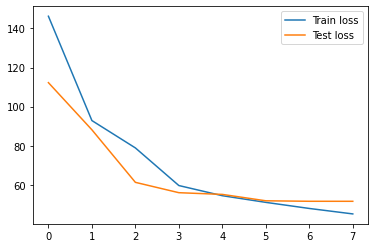

In [68]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();